In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace 'Your_Folder_Path' and 'your_file.tsv' with the actual path and file name
file_path = '/content/drive/MyDrive/Colab Notebooks/amazon_reviews_us_Gift_Card_v1_00.tsv'

try:
  df = pd.read_csv(file_path, sep='\t')
  print(df)
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file at {file_path}. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       marketplace  customer_id       review_id  product_id  product_parent  \
0               US     24371595  R27ZP1F1CD0C3Y  B004LLIL5A       346014806   
1               US     42489718   RJ7RSBCHUDNNE  B004LLIKVU       473048287   
2               US       861463  R1HVYBSKLQJI5S  B00IX1I3G6       926539283   
3               US     25283295  R2HAXF0IIYQBIR  B00IX1I3G6       926539283   
4               US       397970   RNYLPX611NB7Q  B005ESMGV4       379368939   
...            ...          ...             ...         ...             ...   
148305          US     40383801   R57O26VBSLMP1  B0002CZPPG       867256265   
148306          US     15124244  R375D634NGSSPI  B0002CZPPG       867256265   
148307          US     40383801  R2NCVKVC9B7I9C  B0002CZPPG       867256265   
148308          US     30603398   RC2BIM4XKDCY4  B0002CZPPG       867256265   
14

DataFrameの行数 = データ数を確認

In [ ]:
df.shape

(148310, 15)

DataFrameの概要を確認

In [ ]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.483100e+05,1.483100e+05,148310.000000,148310.000000,148310.000000
mean,2.628931e+07,5.406163e+08,4.731333,0.397424,0.490493
std,1.587236e+07,2.661563e+08,0.829255,20.701385,22.823494
min,1.063700e+04,1.100879e+06,1.000000,0.000000,0.000000
25%,1.289732e+07,3.612555e+08,5.000000,0.000000,0.000000
50%,2.499530e+07,4.730483e+08,5.000000,0.000000,0.000000
75%,4.139731e+07,7.754865e+08,5.000000,0.000000,0.000000
max,5.309648e+07,9.992742e+08,5.000000,5987.000000,6323.000000


DataFrameの一部を確認

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


DataFrameの欠損値を確認

In [ ]:
# prompt: DataFrameの欠損を確認したいです

df.isnull().sum()


,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,0
product_category,0
star_rating,0
helpful_votes,0
total_votes,0


star_rating (スター評価)の分布を確認

star_rating
5    129029
4      9808
1      4766
3      3147
2      1560
Name: count, dtype: int64
star_rating
5    0.869995
4    0.066132
1    0.032135
3    0.021219
2    0.010519
Name: proportion, dtype: float64


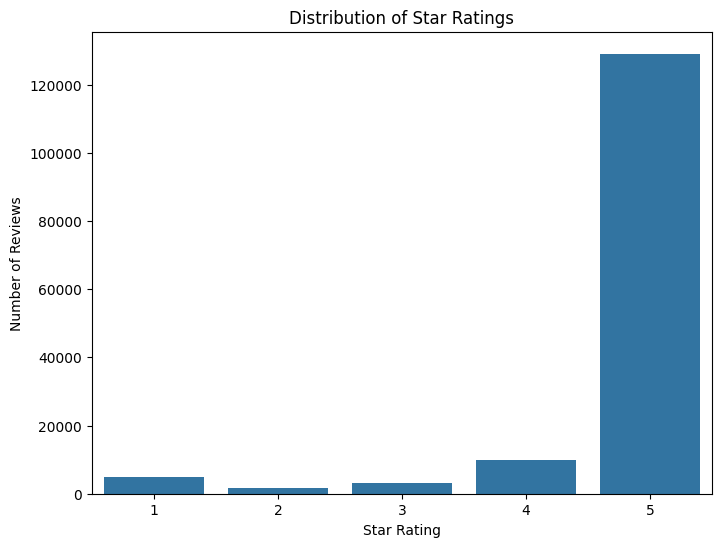

In [ ]:
# prompt: スター評価の分布を確認したいです

# star_rating (スター評価)の分布を確認
print(df['star_rating'].value_counts())
print(df['star_rating'].value_counts(normalize=True)) # 割合で確認
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='star_rating', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()


レビュー文の文章量の分布を確認

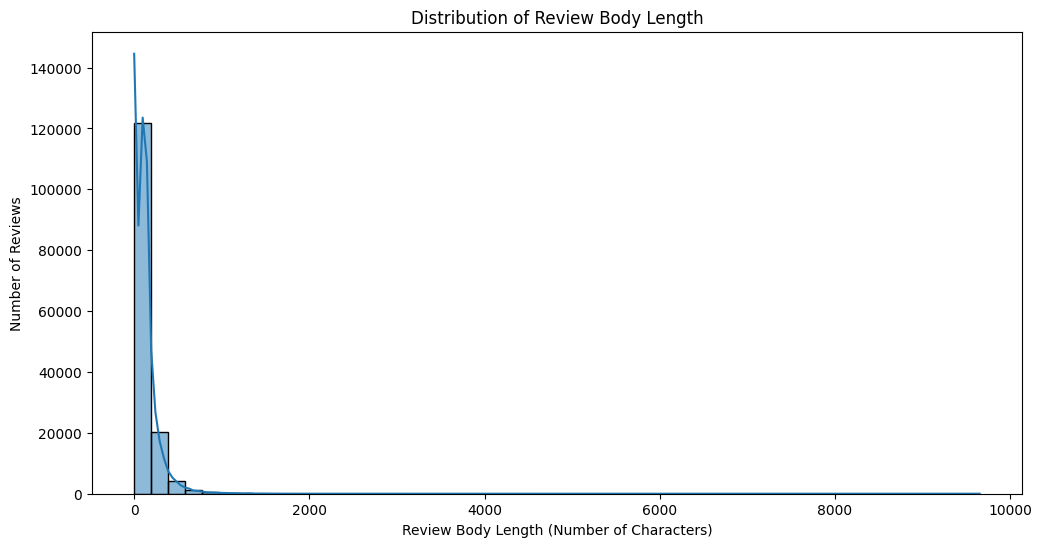

count    148310.000000
mean        127.810876
std         151.635136
min           1.000000
25%          29.000000
50%         110.000000
75%         160.000000
max        9650.000000
Name: review_body_length, dtype: float64


In [ ]:
# prompt: レビュー文の文章量の分布を確認したいです

# レビュー文の長さを計算
df['review_body_length'] = df['review_body'].astype(str).apply(len)

# レビュー文の長さの分布を確認
plt.figure(figsize=(12, 6))
sns.histplot(df['review_body_length'], bins=50, kde=True)
plt.title('Distribution of Review Body Length')
plt.xlabel('Review Body Length (Number of Characters)')
plt.ylabel('Number of Reviews')
plt.show()

# レビュー文の長さの統計量を確認
print(df['review_body_length'].describe())


pysparkでの処理を実装


スター評価の分布確認からやってみる

In [ ]:
# prompt: pysparkでスター評価の分布を実装してみてください

# Install pyspark
!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.appName("StarRatingDistribution").getOrCreate()

# Read the TSV file into a Spark DataFrame
try:
    df_spark = spark.read.csv(file_path, sep='\t', header=True, inferSchema=True)
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    spark.stop()
    exit()


# Show the DataFrame schema
df_spark.printSchema()


# Analyze star rating distribution using PySpark
star_rating_counts = df_spark.groupBy("star_rating").count().orderBy("star_rating")

print("Star Rating Distribution:")
star_rating_counts.show()

# Calculate the distribution as percentages
total_reviews = df_spark.count()
star_rating_percentages = star_rating_counts.withColumn(
    "percentage", (col("count") / total_reviews) * 100
)

print("\nStar Rating Distribution (Percentage):")
star_rating_percentages.show()


# Stop the SparkSession
spark.stop()


root
 |-- marketplace: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)

Star Rating Distribution:
+-----------+------+
|star_rating| count|
+-----------+------+
|          1|  4793|
|          2|  1569|
|          3|  3156|
|          4|  9859|
|          5|129709|
+-----------+------+


Star Rating Distribution (Percentage):
+-----------+------+------------------+
|star_rating| count|        percentage

先ほどの実装を踏まえて、%%timeで処理時間を計測、比較する

In [ ]:
# Pandas処理時間計測
%time
star_rating_counts_pd = df['star_rating'].value_counts()
print("Pandas Star Rating Distribution:\n", star_rating_counts_pd)


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.2 µs
Pandas Star Rating Distribution:
 star_rating
5    129029
4      9808
1      4766
3      3147
2      1560
Name: count, dtype: int64


In [ ]:
# prompt: pysparkでも処理時間を計測する

# Create a SparkSession
spark = SparkSession.builder.appName("StarRatingDistribution").getOrCreate()

# Read the TSV file into a Spark DataFrame
try:
    df_spark = spark.read.csv(file_path, sep='\t', header=True, inferSchema=True)
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    spark.stop()
    exit()

# pyspark処理時間計測
%time
star_rating_counts = df_spark.groupBy("star_rating").count().orderBy("star_rating")
print("PySpark Star Rating Distribution:")
star_rating_counts.show()

# Stop the SparkSession
spark.stop()


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.5 µs
PySpark Star Rating Distribution:
+-----------+------+
|star_rating| count|
+-----------+------+
|          1|  4793|
|          2|  1569|
|          3|  3156|
|          4|  9859|
|          5|129709|
+-----------+------+



verified_purchaseによってグルーピングし、star_ratingがどう変わるかをみてみる
それも処理を比較

In [ ]:
# Pandasでの処理時間計測
%time
pd_sort = df.groupby("verified_purchase")["star_rating"].mean()
print(pd_sort)

# PySparkでの処理
# SparkSessionの作成
spark = SparkSession.builder.appName("VineStarRatingDistribution").getOrCreate()

# PySparkでの処理時間計測
%time
pyspark_sort = df_spark.groupBy("verified_purchase").agg({"star_rating": "mean"})

# SparkSessionの停止
spark.stop()


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
verified_purchase
N    4.578143
Y    4.746077
Name: star_rating, dtype: float64
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


40MB程度のデータだとそこまで差が出ないが、このような形で分散処理を実装できる